In [1]:
import pandas as pd
df=pd.read_csv("training_data.csv")

C:\Users\Lasya Priya D\AppData\Local\Temp\ipykernel_8776\3133159845.py:2: DtypeWarning: Columns (15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,

In [2]:
df['id']=df['id'].fillna(" ")
df['headline']=df['headline'].fillna(" ")
df['written_by']=df['written_by'].fillna(" ")
df['news']=df['news'].fillna(" ")
df['label']=df['label'].fillna(" ")

In [3]:
df.dropna(axis=1)

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â€” In Sonny Perdueâ€™s telling,...",0
1,10041,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...,David Waldstein,HOUSTON â€” Venezuela had a plan. It was a ...,0
2,19113,Cotton to House: â€™Do Not Walk the Plank and ...,Pam Key,"Sunday on ABCâ€™s â€œThis Week,â€ while discu...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â€” The beleaguered Republican...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...
9616,9207,YOUTUBE BANS â€˜CLINTONâ€™S BLACK SONâ€™,Iron Sheik,Home â€º US NEWS â€º YOUTUBE BANS â€˜CLINTONâ€...,1
9617,4444,The Sex Scandal That Could Change The Election,Jason Bermas,We Are Change \nWith only days away from the m...,1
9618,5822,Trump Releases New TV Ad that Uses Anthony Wei...,LN Buzz Team,A candidate under FBI investigation? Check.\nA...,1
9619,12732,"Michael Flynn, Kim Jong-un: Your Tuesday Eveni...",Karen Zraick and Lisa Iaboni,(Want to get this briefing by email? Hereâ€™s ...,0


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming x contains your features (text data) and y contains corresponding binary labels (0 or 1)
# Split the data into training and testing sets
x = df['news']
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=2000)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can also try different kernels like 'rbf'
svm_classifier.fit(x_train_tfidf, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(x_test_tfidf)

# Calculate accuracy and display the results
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 90.65%
Classification Report:
                                                                                                                                                                                                                                                                                                                                                                               precision    recall  f1-score   support

                                                                                                                                                                                                                                                                                                                                                                                    0.87      0.98      0.92       326
                                                                                                                                                 

C:\Users\Lasya Priya D\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lasya Priya D\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lasya Priya D\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Assuming x contains your features (text data) and y contains corresponding binary labels (0 or 1)
# Split the data into training and testing sets
x=df['news']
y=df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=2000)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can also try different kernels like 'rbf'
svm_classifier.fit(x_train_tfidf, y_train)

# Make predictions for each news article in the testing data
predictions = svm_classifier.predict(x_test_tfidf)

# Assuming x_test contains your testing text data and predictions is a list of predicted labels

# Create a new column 'predictions' in the x_test DataFrame and store the predictions
x_test['predictions'] = predictions

# Assuming you have a 'news' column containing news articles in your original dataset
# Add the 'news' column to the x_test DataFrame
x_test['news'] =df['news']

# Display the testing data with 'news' and corresponding predictions
print("Testing Data with News and Predictions:")
print(x_test[['news', 'predictions']])



Testing Data with News and Predictions:
news           0       WASHINGTON  â€”   In Sonny Perdueâ€™s ...
predictions    [1, 0, 0,  , 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, ...
Name: news, dtype: object


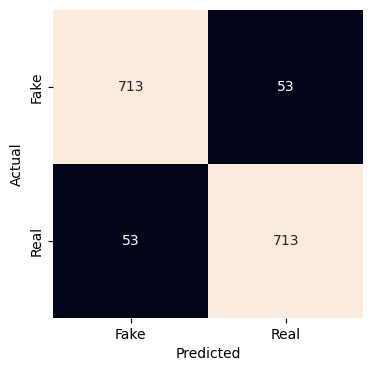

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report
cm = confusion_matrix(y_test, predictions, labels = ['1', '0'])
plt.figure(figsize = (4,4))
sns.heatmap(cm, annot = True, fmt = 'g', cbar = False)
plt.xticks(ticks = [0.5, 1.5], labels = ['Fake', 'Real'])
plt.yticks(ticks = [0.5, 1.5], labels= ['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Assuming x contains your features (text data) and y contains corresponding binary labels (0 or 1)
# Split the data into training and testing sets
x=df['news']
y=df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=2000)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='poly')  
svm_classifier.fit(x_train_tfidf, y_train)

# Make predictions for each news article in the testing data
predictions = svm_classifier.predict(x_test_tfidf)

# Assuming x_test contains your testing text data and predictions is a list of predicted labels

# Create a new column 'predictions' in the x_test DataFrame and store the predictions
x_test['predictions'] = predictions

# Assuming you have a 'news' column containing news articles in your original dataset
# Add the 'news' column to the x_test DataFrame
x_test['news'] =df['news']

# Display the testing data with 'news' and corresponding predictions
print("Testing Data with News and Predictions:")
print(x_test[['news', 'predictions']])



Testing Data with News and Predictions:
news           0       WASHINGTON  â€”   In Sonny Perdueâ€™s ...
predictions    [1, 0, 0,  , 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, ...
Name: news, dtype: object


In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Assuming x contains your features (text data) and y contains corresponding binary labels (0 or 1)
# Split the data into training and testing sets
x=df['news']
y=df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=2000)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='rbf')  
svm_classifier.fit(x_train_tfidf, y_train)

# Make predictions for each news article in the testing data
predictions = svm_classifier.predict(x_test_tfidf)

# Assuming x_test contains your testing text data and predictions is a list of predicted labels

# Create a new column 'predictions' in the x_test DataFrame and store the predictions
x_test['predictions'] = predictions

# Assuming you have a 'news' column containing news articles in your original dataset
# Add the 'news' column to the x_test DataFrame
x_test['news'] =df['news']

# Display the testing data with 'news' and corresponding predictions
print("Testing Data with News and Predictions:")
print(x_test[['news', 'predictions']])



Testing Data with News and Predictions:
news           0       WASHINGTON  â€”   In Sonny Perdueâ€™s ...
predictions    [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, ...
Name: news, dtype: object


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Assuming x contains your features (text data) and y contains corresponding binary labels (0 or 1)
# Split the data into training and testing sets
x=df['news']
y=df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=2000)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='sigmoid')  
svm_classifier.fit(x_train_tfidf, y_train)

# Make predictions for each news article in the testing data
predictions = svm_classifier.predict(x_test_tfidf)

# Assuming x_test contains your testing text data and predictions is a list of predicted labels

# Create a new column 'predictions' in the x_test DataFrame and store the predictions
x_test['predictions'] = predictions

# Assuming you have a 'news' column containing news articles in your original dataset
# Add the 'news' column to the x_test DataFrame
x_test['news'] =df['news']

# Display the testing data with 'news' and corresponding predictions
print("Testing Data with News and Predictions:")
print(x_test[['news', 'predictions']])



Testing Data with News and Predictions:
news           0       WASHINGTON  â€”   In Sonny Perdueâ€™s ...
predictions    [1, 0, 0,  , 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, ...
Name: news, dtype: object
